# Data Cleaning

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

In [2]:
# file_path = '/content/drive/MyDrive/upfall/CompleteDataSet.csv'
# df = pd.read_csv(file_path);
# df.info()

df = pd.read_csv('CompleteDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      294678 non-null  object 
 1   Ankle_acc_x    294678 non-null  float64
 2   Ankle_acc_y    294678 non-null  float64
 3   Ankle_acc_z    294678 non-null  float64
 4   Ankle_gyro_x   294678 non-null  float64
 5   Ankle_gyro_y   294678 non-null  float64
 6   Ankle_gyro_z   294678 non-null  float64
 7   Pocket_acc_x   258569 non-null  float64
 8   Pocket_acc_y   258569 non-null  float64
 9   Pocket_acc_z   258569 non-null  float64
 10  Pocket_gyro_x  258569 non-null  float64
 11  Pocket_gyro_y  258569 non-null  float64
 12  Pocket_gyro_z  258569 non-null  float64
 13  Belt_acc_x     294678 non-null  float64
 14  Belt_acc_y     294678 non-null  float64
 15  Belt_acc_z     294678 non-null  float64
 16  Belt_gyro_x    294678 non-null  float64
 17  Belt_gyro_y    294678 non-nul

In [3]:
# Check for null values in the dataset
print(df.isnull().sum())


TimeStamp            0
Ankle_acc_x          0
Ankle_acc_y          0
Ankle_acc_z          0
Ankle_gyro_x         0
Ankle_gyro_y         0
Ankle_gyro_z         0
Pocket_acc_x     36109
Pocket_acc_y     36109
Pocket_acc_z     36109
Pocket_gyro_x    36109
Pocket_gyro_y    36109
Pocket_gyro_z    36109
Belt_acc_x           0
Belt_acc_y           0
Belt_acc_z           0
Belt_gyro_x          0
Belt_gyro_y          0
Belt_gyro_z          0
Neck_acc_x           0
Neck_acc_y           0
Neck_acc_z           0
Neck_gyro_x          0
Neck_gyro_y          0
Neck_gyro_z          0
Wrist_acc_x          0
Wrist_acc_y          0
Wrist_acc_z          0
Wrist_gyro_x         0
Wrist_gyro_y         0
Wrist_gyro_z         0
Subject              0
Activity             0
Trial                0
Tag                  0
dtype: int64


In [4]:
# Remove rows with any null values
df_cleaned = df.dropna()

# Verify if null values still exist
print(df_cleaned.isnull().sum())

# Check new shape of the dataset
print("Original shape:", df.shape)
print("New shape after dropping nulls:", df_cleaned.shape)


TimeStamp        0
Ankle_acc_x      0
Ankle_acc_y      0
Ankle_acc_z      0
Ankle_gyro_x     0
Ankle_gyro_y     0
Ankle_gyro_z     0
Pocket_acc_x     0
Pocket_acc_y     0
Pocket_acc_z     0
Pocket_gyro_x    0
Pocket_gyro_y    0
Pocket_gyro_z    0
Belt_acc_x       0
Belt_acc_y       0
Belt_acc_z       0
Belt_gyro_x      0
Belt_gyro_y      0
Belt_gyro_z      0
Neck_acc_x       0
Neck_acc_y       0
Neck_acc_z       0
Neck_gyro_x      0
Neck_gyro_y      0
Neck_gyro_z      0
Wrist_acc_x      0
Wrist_acc_y      0
Wrist_acc_z      0
Wrist_gyro_x     0
Wrist_gyro_y     0
Wrist_gyro_z     0
Subject          0
Activity         0
Trial            0
Tag              0
dtype: int64
Original shape: (294678, 35)
New shape after dropping nulls: (258569, 35)


In [5]:
# Drop the TimeStamp column since it's not numeric
df_numeric = df_cleaned.drop(['TimeStamp'], axis=1)

# Compute the correlation matrix on numeric columns only
corr = df_numeric.corr()

# Define the sensor columns for Pocket and the other body parts
pocket_cols = [col for col in df_numeric.columns if col.startswith("Pocket")]
other_body_parts = {
    "Ankle": [col for col in df_numeric.columns if col.startswith("Ankle")],
    "Belt": [col for col in df_numeric.columns if col.startswith("Belt")],
    "Neck": [col for col in df_numeric.columns if col.startswith("Neck")],
    "Wrist": [col for col in df_numeric.columns if col.startswith("Wrist")]
}

# Compute the average absolute correlation between Pocket sensors and each body part's sensors
avg_corr = {}
for part, cols in other_body_parts.items():
    sub_corr = corr.loc[pocket_cols, cols]
    avg_corr[part] = sub_corr.abs().mean().mean()

print("Average absolute correlation with Pocket sensors:")
for part, value in avg_corr.items():
    print(f"{part}: {value:.4f}")

# Determine the body part with the highest average absolute correlation with Pocket sensors
best_part = max(avg_corr, key=avg_corr.get)
print(f"\nThe body part with the best correlation with Pocket sensors is: {best_part}")


Average absolute correlation with Pocket sensors:
Ankle: 0.0424
Belt: 0.0552
Neck: 0.0583
Wrist: 0.0354

The body part with the best correlation with Pocket sensors is: Neck


In [6]:
# Make a copy of the full DataFrame so we don't modify the original
df_filled = df.copy()

# Fill missing Pocket sensor values with corresponding Neck sensor values without chained assignment
df_filled['Pocket_acc_x'] = df_filled['Pocket_acc_x'].fillna(df_filled['Neck_acc_x'])
df_filled['Pocket_acc_y'] = df_filled['Pocket_acc_y'].fillna(df_filled['Neck_acc_y'])
df_filled['Pocket_acc_z'] = df_filled['Pocket_acc_z'].fillna(df_filled['Neck_acc_z'])
df_filled['Pocket_gyro_x'] = df_filled['Pocket_gyro_x'].fillna(df_filled['Neck_gyro_x'])
df_filled['Pocket_gyro_y'] = df_filled['Pocket_gyro_y'].fillna(df_filled['Neck_gyro_y'])
df_filled['Pocket_gyro_z'] = df_filled['Pocket_gyro_z'].fillna(df_filled['Neck_gyro_z'])

# List of Pocket sensor columns for verification
pocket_cols = ['Pocket_acc_x', 'Pocket_acc_y', 'Pocket_acc_z',
               'Pocket_gyro_x', 'Pocket_gyro_y', 'Pocket_gyro_z']

# Verify if there are any remaining null values in the Pocket sensor columns
print("Missing values in Pocket sensor columns after filling:")
print(df_filled[pocket_cols].isnull().sum())


Missing values in Pocket sensor columns after filling:
Pocket_acc_x     0
Pocket_acc_y     0
Pocket_acc_z     0
Pocket_gyro_x    0
Pocket_gyro_y    0
Pocket_gyro_z    0
dtype: int64


In [7]:
# Check for null values in the dataset
print(df_filled.isnull().sum())


TimeStamp        0
Ankle_acc_x      0
Ankle_acc_y      0
Ankle_acc_z      0
Ankle_gyro_x     0
Ankle_gyro_y     0
Ankle_gyro_z     0
Pocket_acc_x     0
Pocket_acc_y     0
Pocket_acc_z     0
Pocket_gyro_x    0
Pocket_gyro_y    0
Pocket_gyro_z    0
Belt_acc_x       0
Belt_acc_y       0
Belt_acc_z       0
Belt_gyro_x      0
Belt_gyro_y      0
Belt_gyro_z      0
Neck_acc_x       0
Neck_acc_y       0
Neck_acc_z       0
Neck_gyro_x      0
Neck_gyro_y      0
Neck_gyro_z      0
Wrist_acc_x      0
Wrist_acc_y      0
Wrist_acc_z      0
Wrist_gyro_x     0
Wrist_gyro_y     0
Wrist_gyro_z     0
Subject          0
Activity         0
Trial            0
Tag              0
dtype: int64


In [8]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      294678 non-null  object 
 1   Ankle_acc_x    294678 non-null  float64
 2   Ankle_acc_y    294678 non-null  float64
 3   Ankle_acc_z    294678 non-null  float64
 4   Ankle_gyro_x   294678 non-null  float64
 5   Ankle_gyro_y   294678 non-null  float64
 6   Ankle_gyro_z   294678 non-null  float64
 7   Pocket_acc_x   294678 non-null  float64
 8   Pocket_acc_y   294678 non-null  float64
 9   Pocket_acc_z   294678 non-null  float64
 10  Pocket_gyro_x  294678 non-null  float64
 11  Pocket_gyro_y  294678 non-null  float64
 12  Pocket_gyro_z  294678 non-null  float64
 13  Belt_acc_x     294678 non-null  float64
 14  Belt_acc_y     294678 non-null  float64
 15  Belt_acc_z     294678 non-null  float64
 16  Belt_gyro_x    294678 non-null  float64
 17  Belt_gyro_y    294678 non-nul

# Feature Extraction

In [9]:
import numpy as np
import pandas as pd

# Define meta columns and sensor columns (assuming TimeStamp, Subject, Activity, Trial, Tag are meta)
meta_cols = ['TimeStamp', 'Subject', 'Activity', 'Trial', 'Tag']
sensor_cols = [col for col in df_filled.columns if col not in meta_cols]

# Frequency domain helper: compute FFT-based features
def compute_fft_features(signal):
    """
    Compute frequency domain features for a 1D signal:
    - dominant frequency: frequency bin with maximum amplitude (ignoring DC component)
    - energy: sum of squared magnitudes (normalized by window length)

    Note: Without a known sampling rate, the frequency is given in units of index bins.
    """
    n = len(signal)
    # Use real FFT for efficiency (only positive frequencies)
    fft_vals = np.fft.rfft(signal)
    mag = np.abs(fft_vals)

    # Ignore the DC component for dominant frequency search if possible
    if len(mag) > 1:
        dom_freq = np.argmax(mag[1:]) + 1  # add one to adjust for the removed DC component
    else:
        dom_freq = 0

    energy = np.sum(mag**2) / n
    return dom_freq, energy

# Feature extraction function for a given window and window size label
def extract_features(window, window_size):
    """
    Extract both time domain and frequency domain features for each sensor column in the window.
    """
    features = {}

    # For each sensor column, compute time domain and frequency domain features
    for col in sensor_cols:
        data = window[col].values

        # Time domain features
        features[col + '_mean'] = np.mean(data)
        features[col + '_std'] = np.std(data)
        features[col + '_min'] = np.min(data)
        features[col + '_max'] = np.max(data)
        features[col + '_median'] = np.median(data)

        # Frequency domain features
        dom_freq, energy = compute_fft_features(data)
        features[col + '_dom_freq'] = dom_freq
        features[col + '_energy'] = energy

    # Meta data (taking the first row's meta info as representative)
    features['Subject'] = window['Subject'].iloc[0]
    features['Activity'] = window['Activity'].iloc[0]
    features['Trial'] = window['Trial'].iloc[0]
    features['window_size'] = window_size
    return features

# List to store features extracted from each window across all window sizes
features_list = []

# Window sizes and corresponding 50% overlap (step = window_size/2)
for window_size in [50, 100, 150]:
    step_size = window_size // 2  # 50% overlap
    for start in range(0, len(df_filled) - window_size + 1, step_size):
        window = df_filled.iloc[start:start+window_size]
        features_list.append(extract_features(window, window_size))

# Create a new DataFrame with all the extracted features
features_df = pd.DataFrame(features_list)

# Display a preview of the extracted features
print(features_df.head())


   Ankle_acc_x_mean  Ankle_acc_x_std  Ankle_acc_x_min  Ankle_acc_x_max  \
0          -1.00834         0.004930           -1.026           -1.000   
1          -1.02344         0.047959           -1.188           -0.775   
2          -0.60652         0.717854           -1.751            1.792   
3          -0.16634         0.586477           -1.751            1.792   
4          -0.20168         0.131091           -0.525            0.102   

   Ankle_acc_x_median  Ankle_acc_x_dom_freq  Ankle_acc_x_energy  \
0             -1.0070                     1           50.838086   
1             -1.0140                     1           52.430184   
2             -1.0135                     1           31.312813   
3             -0.1295                     3            9.990949   
4             -0.2410                     4            2.466544   

   Ankle_acc_y_mean  Ankle_acc_y_std  Ankle_acc_y_min  ...  Wrist_gyro_z_std  \
0           0.21592         0.025794            0.160  ...        114.55

In [10]:
# List all the columns in the new features DataFrame
print("Columns in features_df:")
print(features_df.columns.tolist())

# Print the shape of the DataFrame (number of rows and columns)
print("Shape of features_df:", features_df.shape)


Columns in features_df:
['Ankle_acc_x_mean', 'Ankle_acc_x_std', 'Ankle_acc_x_min', 'Ankle_acc_x_max', 'Ankle_acc_x_median', 'Ankle_acc_x_dom_freq', 'Ankle_acc_x_energy', 'Ankle_acc_y_mean', 'Ankle_acc_y_std', 'Ankle_acc_y_min', 'Ankle_acc_y_max', 'Ankle_acc_y_median', 'Ankle_acc_y_dom_freq', 'Ankle_acc_y_energy', 'Ankle_acc_z_mean', 'Ankle_acc_z_std', 'Ankle_acc_z_min', 'Ankle_acc_z_max', 'Ankle_acc_z_median', 'Ankle_acc_z_dom_freq', 'Ankle_acc_z_energy', 'Ankle_gyro_x_mean', 'Ankle_gyro_x_std', 'Ankle_gyro_x_min', 'Ankle_gyro_x_max', 'Ankle_gyro_x_median', 'Ankle_gyro_x_dom_freq', 'Ankle_gyro_x_energy', 'Ankle_gyro_y_mean', 'Ankle_gyro_y_std', 'Ankle_gyro_y_min', 'Ankle_gyro_y_max', 'Ankle_gyro_y_median', 'Ankle_gyro_y_dom_freq', 'Ankle_gyro_y_energy', 'Ankle_gyro_z_mean', 'Ankle_gyro_z_std', 'Ankle_gyro_z_min', 'Ankle_gyro_z_max', 'Ankle_gyro_z_median', 'Ankle_gyro_z_dom_freq', 'Ankle_gyro_z_energy', 'Pocket_acc_x_mean', 'Pocket_acc_x_std', 'Pocket_acc_x_min', 'Pocket_acc_x_max', 'Po

In [11]:
# This will show how many samples (rows) exist for each window size in the dataset.

window_counts = features_df.groupby("window_size").size()
print(window_counts)


window_size
50     11786
100     5892
150     3928
dtype: int64


In [12]:
# # Save the features DataFrame to Google Drive
# features_df.to_csv('/content/drive/MyDrive/upfall/features_df.csv', index=False)
# print("Saved features_df to Google Drive.")


# features_df.to_csv('features_df.csv', index=False)
# print("Saved features_df locally.")

Dominant features - using Correlation Analysis

In [13]:
# Drop meta columns to get only feature columns
features = features_df.drop(columns=['Subject', 'Activity', 'Trial', 'window_size'])
target = features_df['Activity']  # Assuming Activity is numeric (or encoded)

# Compute the absolute Pearson correlation for each feature with the target
correlations = {}
for col in features.columns:
    correlations[col] = abs(features_df[col].corr(target))

# Sort the features by correlation in descending order
sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 dominant features
print("Top 10 dominant features by correlation with 'Activity':")
for feature, corr_value in sorted_features[:10]:
    print(f"{feature}: {corr_value:.4f}")


Top 10 dominant features by correlation with 'Activity':
Pocket_acc_z_min: 0.3936
Belt_acc_z_median: 0.3912
Belt_acc_z_mean: 0.3732
Neck_acc_z_median: 0.3649
Ankle_acc_y_min: 0.3415
Ankle_gyro_z_dom_freq: 0.3412
Ankle_acc_z_std: 0.3388
Ankle_acc_y_std: 0.3383
Pocket_acc_z_dom_freq: 0.3372
Neck_acc_z_mean: 0.3340


spectral entropy (methods - fft, welch)

In [14]:
import numpy as np
from scipy.signal import welch

def spectral_entropy(signal, sf, method='welch', nperseg=None):
    """
    Compute the spectral entropy of a 1D signal.

    Parameters:
      signal : 1D numpy array
          Input time-domain signal.
      sf : float
          Sampling frequency (in Hz).
      method : str, optional
          Method to compute the power spectral density ('welch' or 'fft').
          Default is 'welch'.
      nperseg : int, optional
          Length of each segment for Welch's method. Ignored if method is 'fft'.

    Returns:
      se : float
          Spectral entropy of the signal.
    """
    if method == 'welch':
        # Use Welch's method to estimate PSD
        freq, psd = welch(signal, sf, nperseg=nperseg)
    elif method == 'fft':
        # Compute PSD using FFT
        fft_vals = np.fft.rfft(signal)
        psd = np.abs(fft_vals) ** 2
        freq = np.fft.rfftfreq(len(signal), d=1/sf)
    else:
        raise ValueError("Method must be 'welch' or 'fft'")

    # Normalize the PSD so that it sums to 1 (i.e., a probability distribution)
    psd_norm = psd / np.sum(psd)

    # Compute spectral entropy using the Shannon entropy formula.
    # Add a tiny value to avoid log(0)
    se = -np.sum(psd_norm * np.log2(psd_norm + np.finfo(float).eps))

    return se

# Example usage:
if __name__ == "__main__":
    # Generate a sample signal (sine wave with added noise)
    sf = 1000  # Sampling frequency (Hz)
    t = np.linspace(0, 1, sf, endpoint=False)
    freq_signal = 50  # Frequency of the sine wave
    signal = np.sin(2 * np.pi * freq_signal * t) + 0.5 * np.random.randn(len(t))

    # Compute spectral entropy using Welch method
    se_welch = spectral_entropy(signal, sf, method='welch', nperseg=256)
    print("Spectral Entropy (Welch):", se_welch)

    # Compute spectral entropy using FFT method
    se_fft = spectral_entropy(signal, sf, method='fft')
    print("Spectral Entropy (FFT):", se_fft)


Spectral Entropy (Welch): 3.814793622119643
Spectral Entropy (FFT): 3.687624125957652


# MODEL Training

SMOTE can be an appropriate technique, particularly if you're working with the extracted feature data (i.e., features_df). Once you've transformed your raw sensor data into feature vectors, your data essentially becomes tabular. In that context, SMOTE is commonly used to synthesize new samples for the minority class and can help address class imbalance.

However, if you plan to oversample on the raw time-series sensor data (from accelerometers or gyroscopes), SMOTE might not capture the temporal dependencies effectively. For raw time-series data, you might need more specialized augmentation techniques that consider the sequential nature of the data.

In summary:
- Extracted Features: SMOTE is appropriate and widely used.
- Raw Time-Series Data: Consider time-series specific augmentation methods.

## Training on PreProcessed Dataset

df name : df_filled

In [15]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      294678 non-null  object 
 1   Ankle_acc_x    294678 non-null  float64
 2   Ankle_acc_y    294678 non-null  float64
 3   Ankle_acc_z    294678 non-null  float64
 4   Ankle_gyro_x   294678 non-null  float64
 5   Ankle_gyro_y   294678 non-null  float64
 6   Ankle_gyro_z   294678 non-null  float64
 7   Pocket_acc_x   294678 non-null  float64
 8   Pocket_acc_y   294678 non-null  float64
 9   Pocket_acc_z   294678 non-null  float64
 10  Pocket_gyro_x  294678 non-null  float64
 11  Pocket_gyro_y  294678 non-null  float64
 12  Pocket_gyro_z  294678 non-null  float64
 13  Belt_acc_x     294678 non-null  float64
 14  Belt_acc_y     294678 non-null  float64
 15  Belt_acc_z     294678 non-null  float64
 16  Belt_gyro_x    294678 non-null  float64
 17  Belt_gyro_y    294678 non-nul

In [16]:
# For df_filled: Create a new numeric binary target column 'BinaryActivity'
# Mapping: Activities 1 to 5 -> 1 (Fall), Activities 6 to 11 -> 0 (ADL)
df_filled['BinaryActivity'] = df_filled['Activity'].apply(lambda x: 1 if x in range(1, 6) else 0)

# Check the distribution of the new binary target column
print("Distribution in df_filled:")
print(df_filled['BinaryActivity'].value_counts())


Distribution in df_filled:
BinaryActivity
0    248727
1     45951
Name: count, dtype: int64


## Training on Feature Dataset

df name : features_df

In [22]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Columns: 215 entries, Ankle_acc_x_mean to BinaryActivity
dtypes: float64(180), int64(35)
memory usage: 35.4 MB


In [23]:
# For features_df: Create a new numeric binary target column 'BinaryActivity'
# Mapping: Activities 1 to 5 -> 1 (Fall), Activities 6 to 11 -> 0 (ADL)
features_df['BinaryActivity'] = features_df['Activity'].apply(lambda x: 1 if x in range(1, 6) else 0)

# Check the distribution of the new binary target column
print("Distribution in features_df:")
print(features_df['BinaryActivity'].value_counts())


Distribution in features_df:
BinaryActivity
0    18238
1     3368
Name: count, dtype: int64


### Training with Full Feature Set (214)

#### Random Forest


##### 1. Iterate by Window Size
- The code extracts unique window sizes from the `window_size` column in `features_df`.
- For each window size (e.g., 50, 100, 150), a subset of the data is created.

##### 2. Data Preparation for Each Body Position
- **Predictors (X):**  
  For each body position (e.g., Ankle, Pocket, Belt, Neck, Wrist), the code filters the columns that contain the body part’s name.
- **Target (y):**  
  The target remains the `BinaryActivity` column.
- The dataset is split into training and test sets using stratification to maintain class balance.

##### 3. SMOTE Application
- SMOTE is applied to the training data to balance the classes by generating synthetic samples for the minority class.

##### 4. Random Forest Training & Evaluation
- A Random Forest classifier is trained on the SMOTE-resampled training data for each body position.
- Predictions are made on the test set.
- Evaluation metrics such as accuracy, the classification report, and the confusion matrix are computed and printed for each body position.

##### 5. Result Summary
- The results for each window size and each body position are stored in a nested dictionary (`results`).
- A summary is printed at the end for quick comparison.

This code allows you to compare how different window sizes affect the model's performance for each body position where sensors are placed.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# List of meta columns that are not used as predictors
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define the body positions (assuming feature column names include these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df
window_sizes = features_df['window_size'].unique()

# Dictionary to store results for each window size and each body position
results = {}

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset features_df for the current window size
    df_ws = features_df[features_df['window_size'] == ws]

    # Initialize a dictionary for this window size
    results[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        # (Assumes feature column names contain the body part string, e.g., "Ankle_acc_x_mean")
        body_cols = [col for col in df_ws.columns if body in col]

        # Check if any columns were found for the body position
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split data into training and testing sets (with stratification)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Initialize and train the Random Forest classifier
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = rf.predict(X_test)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print the evaluation metrics for this body part
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of Results:")
for ws, body_results in results.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.9779474130619169
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1990
           1       0.91      0.95      0.93       368

    accuracy                           0.98      2358
   macro avg       0.95      0.97      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1956   34]
 [  18  350]]

Body Position: Pocket
Accuracy: 0.9779474130619169
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.92      0.94      0.93       368

    accuracy                           0.98      2358
   macro avg       0.96      0.96      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1961   29]
 [  23  345]]

Body Position: Belt
Accuracy: 0.9758269720101781
Classification Report:
         

#### SVM

1. **Iterate by Window Size**  
   - The code extracts unique window sizes from the `window_size` column in `features_df`.
   - For each window size (e.g., 50, 100, 150), a subset of the data is created.

2. **Data Preparation for Each Body Position**  
   - **Predictors (X):**  
     For each body position (e.g., Ankle, Pocket, Belt, Neck, Wrist), the code filters the columns that contain the body part’s name.
   - **Target (y):**  
     The target remains the `BinaryActivity` column.
   - The dataset is split into training and test sets using stratification to maintain class balance.

3. **Feature Scaling**  
   - SVM is sensitive to the scale of the features.
   - The `StandardScaler` is used to standardize the features:
     - It is fitted on the training set and then used to transform both the training and test sets.

4. **SMOTE Application**  
   - SMOTE is applied to the training data to balance the classes by generating synthetic samples for the minority class.

5. **SVM Training & Evaluation**  
   - An SVM classifier is initialized and trained on the SMOTE-resampled, scaled training data for each body position.
   - Predictions are made on the scaled test set.
   - Evaluation metrics such as accuracy, the classification report, and the confusion matrix are computed and printed for each body position.

6. **Result Summary**  
   - The results for each window size and each body position are stored in a nested dictionary (`results_svm`).
   - A summary is printed at the end for quick comparison.

This code allows you to compare how different window sizes affect the performance of the SVM classifier for each body position where sensors are placed.


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assumes feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df
window_sizes = features_df['window_size'].unique()

results_svm = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset the features_df for the current window size
    df_ws = features_df[features_df['window_size'] == ws]

    # Initialize dictionary for current window size
    results_svm[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize the features since SVM is sensitive to feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

        # Initialize and train the SVM classifier
        svm = SVC(random_state=42)
        svm.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = svm.predict(X_test_scaled)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store results for the current body position and window size
        results_svm[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of SVM Results:")
for ws, body_results in results_svm.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.9279050042408821
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1990
           1       0.70      0.93      0.80       368

    accuracy                           0.93      2358
   macro avg       0.84      0.93      0.88      2358
weighted avg       0.94      0.93      0.93      2358

Confusion Matrix:
[[1846  144]
 [  26  342]]

Body Position: Pocket
Accuracy: 0.9245122985581001
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1990
           1       0.74      0.80      0.77       368

    accuracy                           0.92      2358
   macro avg       0.85      0.87      0.86      2358
weighted avg       0.93      0.92      0.93      2358

Confusion Matrix:
[[1887  103]
 [  75  293]]

Body Position: Belt
Accuracy: 0.9223918575063613
Classification Report:
         

#### KNN

1. **Iterate by Window Size**  
   - The code extracts unique window sizes from the `window_size` column in `features_df`.
   - For each window size (e.g., 50, 100, 150), a subset of the data is created.

2. **Data Preparation for Each Body Position**  
   - **Predictors (X):**  
     For each body position (e.g., Ankle, Pocket, Belt, Neck, Wrist), the code filters the columns that contain the body part’s name.
   - **Target (y):**  
     The target remains the `BinaryActivity` column.
   - The dataset is split into training and test sets using stratification to maintain class balance.

3. **SMOTE Application**  
   - SMOTE is applied to the training data to balance the classes by generating synthetic samples for the minority class.

4. **KNN Training & Evaluation**  
   - A KNN classifier is initialized (default is 5 neighbors, but you can adjust this parameter).
   - The classifier is trained on the SMOTE-resampled training data for each body position.
   - Predictions are made on the test set.
   - Evaluation metrics such as accuracy, the classification report, and the confusion matrix are computed and printed for each body position.

5. **Result Summary**  
   - The results for each window size and each body position are stored in a nested dictionary (`results_knn`).
   - A summary is printed at the end for quick comparison.

This code allows you to compare how different window sizes affect the performance of the KNN classifier for each body position where sensors are placed.


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assuming feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df
window_sizes = features_df['window_size'].unique()

results_knn = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset features_df for the current window size
    df_ws = features_df[features_df['window_size'] == ws]

    # Initialize dictionary for the current window size
    results_knn[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split the data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Initialize and train the KNN classifier (default is 5 neighbors)
        knn = KNeighborsClassifier()
        knn.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results_knn[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of KNN Results:")
for ws, body_results in results_knn.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.811704834605598
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1990
           1       0.44      0.71      0.54       368

    accuracy                           0.81      2358
   macro avg       0.69      0.77      0.71      2358
weighted avg       0.86      0.81      0.83      2358

Confusion Matrix:
[[1651  339]
 [ 105  263]]

Body Position: Pocket
Accuracy: 0.7434266327396098
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.83      1990
           1       0.33      0.62      0.43       368

    accuracy                           0.74      2358
   macro avg       0.62      0.69      0.63      2358
weighted avg       0.82      0.74      0.77      2358

Confusion Matrix:
[[1524  466]
 [ 139  229]]

Body Position: Belt
Accuracy: 0.7849872773536896
Classification Report:
          

#### XGBoost

1. **Iterate by Window Size**  
   - The code extracts unique window sizes from the `window_size` column in `features_df`.  
   - For each window size (e.g., 50, 100, 150), a subset of the data is created.

2. **Data Preparation for Each Body Position**  
   - **Predictors (X):**  
     For each body position (e.g., Ankle, Pocket, Belt, Neck, Wrist), the code filters the columns that contain the body part’s name.  
   - **Target (y):**  
     The target remains the `BinaryActivity` column.  
   - The dataset is split into training and test sets using stratification to maintain class balance.

3. **SMOTE Application**  
   - SMOTE is applied to the training data to balance the classes by generating synthetic samples for the minority class.

4. **XGBoost Training & Evaluation**  
   - An XGBoost classifier is initialized with parameters to disable the label encoder, set the evaluation metric to 'logloss', and a fixed random state.  
   - The classifier is trained on the SMOTE-resampled training data for each body position.  
   - Predictions are made on the test set.  
   - Evaluation metrics such as accuracy, the classification report, and the confusion matrix are computed and printed for each body position.

5. **Result Summary**  
   - The results for each window size and each body position are stored in a nested dictionary (`results_xgb`).  
   - A summary is printed at the end for quick comparison.

This code allows you to compare how different window sizes affect the performance of the XGBoost classifier for each body position where sensors are placed.


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assuming feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df
window_sizes = features_df['window_size'].unique()

results_xgb = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset features_df for the current window size
    df_ws = features_df[features_df['window_size'] == ws]

    # Initialize dictionary for the current window size
    results_xgb[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split the data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Initialize and train the XGBoost classifier
        xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        xgb_model.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = xgb_model.predict(X_test)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results_xgb[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of XGBoost Results:")
for ws, body_results in results_xgb.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9809160305343512
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.93      0.95      0.94       368

    accuracy                           0.98      2358
   macro avg       0.96      0.97      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1965   25]
 [  20  348]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9834605597964376
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.96      0.93      0.95       368

    accuracy                           0.98      2358
   macro avg       0.97      0.96      0.97      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1975   15]
 [  24  344]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9758269720101781
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1990
           1       0.91      0.94      0.92       368

    accuracy                           0.98      2358
   macro avg       0.95      0.96      0.95      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1956   34]
 [  23  345]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.9728583545377438
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1990
           1       0.92      0.90      0.91       368

    accuracy                           0.97      2358
   macro avg       0.95      0.95      0.95      2358
weighted avg       0.97      0.97      0.97      2358

Confusion Matrix:
[[1961   29]
 [  35  333]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.955470737913486
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1990
           1       0.83      0.90      0.86       368

    accuracy                           0.96      2358
   macro avg       0.90      0.93      0.92      2358
weighted avg       0.96      0.96      0.96      2358

Confusion Matrix:
[[1920   70]
 [  35  333]]

--- Window Size: 100 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9787955894826124
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       995
           1       0.90      0.97      0.93       184

    accuracy                           0.98      1179
   macro avg       0.95      0.97      0.96      1179
weighted avg       0.98      0.98      0.98      1179

Confusion Matrix:
[[976  19]
 [  6 178]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9745547073791349
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       995
           1       0.90      0.94      0.92       184

    accuracy                           0.97      1179
   macro avg       0.94      0.96      0.95      1179
weighted avg       0.98      0.97      0.97      1179

Confusion Matrix:
[[976  19]
 [ 11 173]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9643765903307888
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       995
           1       0.89      0.88      0.88       184

    accuracy                           0.96      1179
   macro avg       0.94      0.93      0.93      1179
weighted avg       0.96      0.96      0.96      1179

Confusion Matrix:
[[976  19]
 [ 23 161]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.9770992366412213
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       995
           1       0.93      0.92      0.93       184

    accuracy                           0.98      1179
   macro avg       0.96      0.95      0.96      1179
weighted avg       0.98      0.98      0.98      1179

Confusion Matrix:
[[983  12]
 [ 15 169]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.9541984732824428
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       995
           1       0.86      0.85      0.85       184

    accuracy                           0.95      1179
   macro avg       0.91      0.91      0.91      1179
weighted avg       0.95      0.95      0.95      1179

Confusion Matrix:
[[969  26]
 [ 28 156]]

--- Window Size: 150 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9770992366412213
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       664
           1       0.91      0.95      0.93       122

    accuracy                           0.98       786
   macro avg       0.95      0.97      0.96       786
weighted avg       0.98      0.98      0.98       786

Confusion Matrix:
[[652  12]
 [  6 116]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9809160305343512
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       664
           1       0.91      0.97      0.94       122

    accuracy                           0.98       786
   macro avg       0.95      0.98      0.96       786
weighted avg       0.98      0.98      0.98       786

Confusion Matrix:
[[653  11]
 [  4 118]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9809160305343512
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       664
           1       0.90      0.98      0.94       122

    accuracy                           0.98       786
   macro avg       0.95      0.98      0.96       786
weighted avg       0.98      0.98      0.98       786

Confusion Matrix:
[[651  13]
 [  2 120]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.9847328244274809
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       664
           1       0.92      0.99      0.95       122

    accuracy                           0.98       786
   macro avg       0.96      0.99      0.97       786
weighted avg       0.99      0.98      0.98       786

Confusion Matrix:
[[653  11]
 [  1 121]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.9631043256997456
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       664
           1       0.85      0.93      0.89       122

    accuracy                           0.96       786
   macro avg       0.92      0.95      0.93       786
weighted avg       0.97      0.96      0.96       786

Confusion Matrix:
[[644  20]
 [  9 113]]

Summary of XGBoost Results:

Window Size: 50
  Ankle - Accuracy: 0.9809
  Pocket - Accuracy: 0.9835
  Belt - Accuracy: 0.9758
  Neck - Accuracy: 0.9729
  Wrist - Accuracy: 0.9555

Window Size: 100
  Ankle - Accuracy: 0.9788
  Pocket - Accuracy: 0.9746
  Belt - Accuracy: 0.9644
  Neck - Accuracy: 0.9771
  Wrist - Accuracy: 0.9542

Window Size: 150
  Ankle - Accuracy: 0.9771
  Pocket - Accuracy: 0.9809
  Belt - Accuracy: 0.9809
  Neck - Accuracy: 0.9847
  Wrist - Accuracy: 0.9631


### Training with Reduced Feature Set (148)

#### Correlation

In [24]:
# Compute Pearson Correlation for All Features
# This calculates the Pearson correlation coefficient between all feature pairs.

correlation_matrix = features_df.corr()
print(correlation_matrix)


                    Ankle_acc_x_mean  Ankle_acc_x_std  Ankle_acc_x_min  \
Ankle_acc_x_mean            1.000000        -0.125828         0.831562   
Ankle_acc_x_std            -0.125828         1.000000        -0.617321   
Ankle_acc_x_min             0.831562        -0.617321         1.000000   
Ankle_acc_x_max             0.784889         0.457376         0.351596   
Ankle_acc_x_median          0.991449        -0.101038         0.804165   
...                              ...              ...              ...   
Subject                     0.325906        -0.011255         0.256644   
Activity                    0.059418        -0.159044         0.179744   
Trial                      -0.005299         0.004184        -0.016307   
window_size                -0.000019         0.046904        -0.059790   
BinaryActivity              0.168491         0.167664         0.025711   

                    Ankle_acc_x_max  Ankle_acc_x_median  Ankle_acc_x_dom_freq  \
Ankle_acc_x_mean           0.7

In [26]:
# Find the Top Correlated Features with the Target (BinaryActivity)
# If you want to see how each feature correlates with BinaryActivity (Fall vs ADL), use:
# This will show features that have the strongest positive or negative correlation with the target.

target_corr = correlation_matrix["BinaryActivity"].sort_values(ascending=False)
print(target_corr)


BinaryActivity        1.000000
Wrist_acc_z_max       0.395982
Wrist_acc_z_std       0.365682
Pocket_acc_z_std      0.353633
Pocket_acc_y_max      0.336782
                        ...   
Neck_acc_x_energy    -0.283129
Wrist_gyro_y_min     -0.298941
Pocket_acc_z_min     -0.324576
Ankle_acc_x_energy   -0.356226
Activity             -0.729607
Name: BinaryActivity, Length: 215, dtype: float64


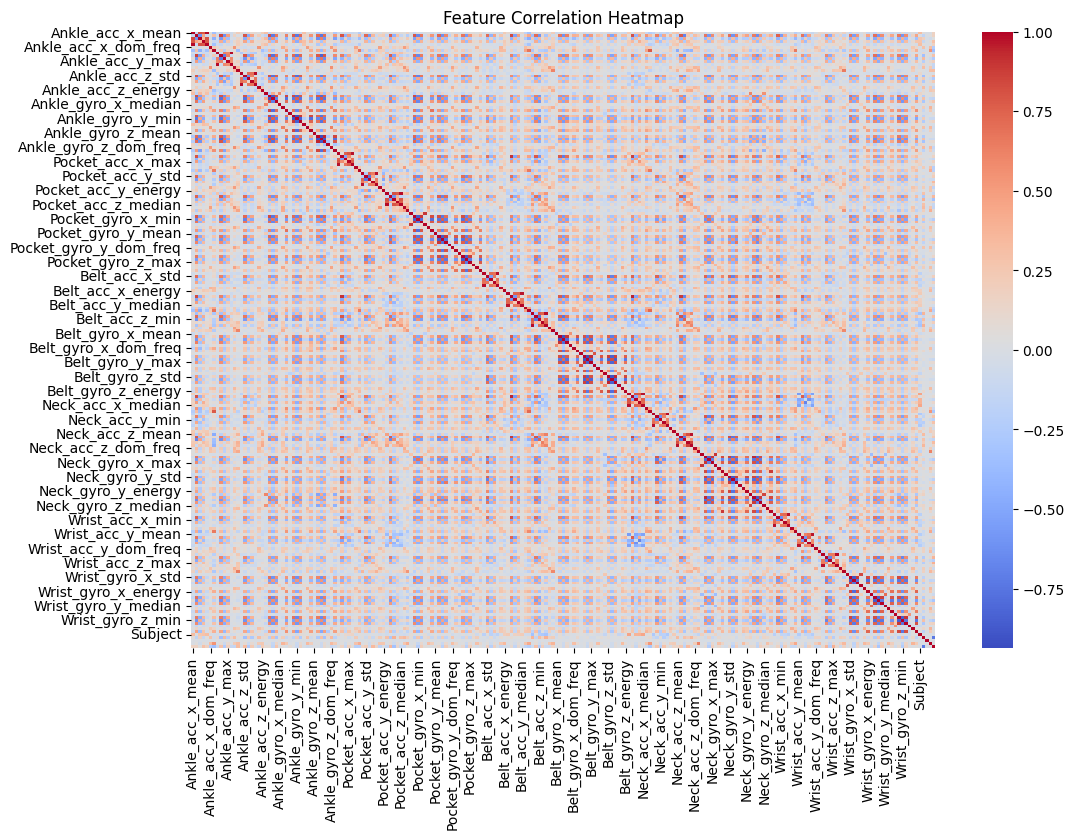

In [27]:
# Visualize the Correlation Matrix (Heatmap)
# Since 214 features make the full heatmap too large, you can visualize only a subset of highly correlated features:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)  # annot=True shows correlation values
plt.title("Feature Correlation Heatmap")
plt.show()


In [30]:
# Identify Highly Correlated Features
# To remove redundant features, you can drop one feature from each highly correlated pair (correlation > 0.90):

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.90
highly_correlated = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print("Highly Correlated Features:", highly_correlated)


Highly Correlated Features: ['Ankle_acc_x_min', 'Ankle_acc_x_median', 'Ankle_acc_y_std', 'Ankle_acc_y_median', 'Ankle_acc_z_median', 'Ankle_gyro_x_std', 'Ankle_gyro_x_max', 'Ankle_gyro_x_energy', 'Ankle_gyro_y_std', 'Ankle_gyro_y_max', 'Ankle_gyro_y_energy', 'Ankle_gyro_z_max', 'Ankle_gyro_z_energy', 'Pocket_acc_x_max', 'Pocket_acc_x_median', 'Pocket_acc_y_median', 'Pocket_acc_z_min', 'Pocket_acc_z_median', 'Pocket_gyro_x_std', 'Pocket_gyro_x_max', 'Pocket_gyro_x_median', 'Pocket_gyro_x_energy', 'Pocket_gyro_y_std', 'Pocket_gyro_y_max', 'Pocket_gyro_y_energy', 'Pocket_gyro_z_std', 'Pocket_gyro_z_max', 'Belt_acc_x_median', 'Belt_acc_y_std', 'Belt_acc_y_median', 'Belt_acc_z_median', 'Belt_gyro_x_max', 'Belt_gyro_x_energy', 'Belt_gyro_y_std', 'Belt_gyro_y_max', 'Belt_gyro_z_std', 'Belt_gyro_z_min', 'Belt_gyro_z_max', 'Belt_gyro_z_energy', 'Neck_acc_x_std', 'Neck_acc_x_median', 'Neck_acc_y_median', 'Neck_acc_z_std', 'Neck_acc_z_max', 'Neck_acc_z_median', 'Neck_gyro_x_max', 'Neck_gyro_x_med

In [31]:
# If you want to drop them:

features_df_reduced = features_df.drop(columns=highly_correlated)
print("New Shape after Dropping Highly Correlated Features:", features_df_reduced.shape)


New Shape after Dropping Highly Correlated Features: (21606, 148)


In [32]:
# NEWWWWWWWWWWWWWWWWWW METHODDDDDDDDD
# Recursive Feature Elimination (RFE) Code
# ---------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

# Load dataset (excluding meta columns)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']
X = features_df.drop(columns=meta_cols)  # Features (excluding meta columns)
y = features_df['BinaryActivity']  # Target variable

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE (Set number of features you want to keep)
n_features_to_select = 50  # Change this based on how many features you want to keep
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Create new dataframe with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Add target variable back to the new dataframe
X_selected_df['BinaryActivity'] = y

# Print shape of the new dataframe
print("\nShape of the reduced feature dataset:", X_selected_df.shape)


Selected Features: Index(['Ankle_acc_x_mean', 'Ankle_acc_x_std', 'Ankle_acc_x_min',
       'Ankle_acc_x_max', 'Ankle_acc_x_median', 'Ankle_acc_x_dom_freq',
       'Ankle_acc_x_energy', 'Ankle_acc_y_mean', 'Ankle_acc_y_std',
       'Ankle_acc_y_median', 'Ankle_acc_z_mean', 'Ankle_acc_z_std',
       'Ankle_acc_z_min', 'Ankle_acc_z_median', 'Ankle_gyro_y_std',
       'Pocket_acc_x_std', 'Pocket_acc_y_std', 'Pocket_acc_y_min',
       'Pocket_acc_y_max', 'Pocket_acc_y_median', 'Pocket_acc_z_std',
       'Pocket_acc_z_min', 'Pocket_acc_z_max', 'Belt_acc_x_mean',
       'Belt_acc_x_median', 'Belt_acc_y_mean', 'Belt_acc_y_std',
       'Belt_acc_y_min', 'Belt_acc_y_max', 'Belt_acc_y_median',
       'Belt_acc_y_dom_freq', 'Belt_acc_z_mean', 'Belt_acc_z_std',
       'Belt_acc_z_min', 'Belt_acc_z_max', 'Belt_acc_z_median',
       'Neck_acc_x_mean', 'Neck_acc_x_std', 'Neck_acc_x_max',
       'Neck_acc_x_energy', 'Neck_acc_y_mean', 'Neck_acc_y_median',
       'Neck_acc_z_mean', 'Neck_acc_z_std', 'Ne

In [34]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define sensor positions and filter features accordingly
sensor_positions = ["Ankle", "Belt", "Wrist", "Neck", "Pocket"]
results = {}

for position in sensor_positions:
    # Select only features corresponding to the current sensor position
    position_features = [feat for feat in selected_features if position.lower() in feat.lower()]
    
    if not position_features:
        print(f"No features found for {position}, skipping...")
        continue
    
    X_position = X_selected_df[position_features]
    y_position = X_selected_df['BinaryActivity']

    # Print the shape of the position-wise dataset
    print(f"\nProcessing {position} position...")
    print(f"Shape of {position} dataset: {X_position.shape}")

    # Check class distribution
    class_counts = y_position.value_counts()
    print("Class Distribution:\n", class_counts)

    # Split data into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_position, y_position, test_size=0.2, random_state=42, stratify=y_position
    )

    # Determine if data is imbalanced
    imbalance_threshold = 0.2  # Adjust if needed
    if (min(class_counts) / max(class_counts)) < imbalance_threshold:
        print("\nData is imbalanced. Applying SMOTE to balance the training data.")
        smote = SMOTE(random_state=42)
        X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    else:
        print("\nData is balanced. Proceeding without SMOTE.")
        X_train_bal, y_train_bal = X_train, y_train

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_bal, y_train_bal)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Convert to dict for easy access
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nResults for {position} position:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # Store results
    results[position] = {
        "accuracy": acc,
        "classification_report": report,
        "confusion_matrix": cm
    }

# Print Summary Results
print("\nSummary of Position-wise Performance:")
for position, res in results.items():
    print(f"\n{position} Position:")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(res["confusion_matrix"])
    print("Classification Report:")
    print(res["classification_report"])



Processing Ankle position...
Shape of Ankle dataset: (21606, 15)
Class Distribution:
 BinaryActivity
0    18238
1     3368
Name: count, dtype: int64

Data is imbalanced. Applying SMOTE to balance the training data.

Results for Ankle position:
Accuracy: 0.9847
Confusion Matrix:
[[3600   48]
 [  18  656]]

Processing Belt position...
Shape of Belt dataset: (21606, 13)
Class Distribution:
 BinaryActivity
0    18238
1     3368
Name: count, dtype: int64

Data is imbalanced. Applying SMOTE to balance the training data.

Results for Belt position:
Accuracy: 0.9836
Confusion Matrix:
[[3602   46]
 [  25  649]]

Processing Wrist position...
Shape of Wrist dataset: (21606, 3)
Class Distribution:
 BinaryActivity
0    18238
1     3368
Name: count, dtype: int64

Data is imbalanced. Applying SMOTE to balance the training data.

Results for Wrist position:
Accuracy: 0.9042
Confusion Matrix:
[[3365  283]
 [ 131  543]]

Processing Neck position...
Shape of Neck dataset: (21606, 11)
Class Distribution:

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# List of meta columns that are not used as predictors
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define the body positions (assuming feature column names include these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df_reduced
window_sizes = features_df_reduced['window_size'].unique()

# Dictionary to store results for each window size and each body position
results = {}

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset features_df_reduced for the current window size
    df_ws = features_df_reduced[features_df_reduced['window_size'] == ws]

    # Initialize a dictionary for this window size
    results[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        # (Assumes feature column names contain the body part string, e.g., "Ankle_acc_x_mean")
        body_cols = [col for col in df_ws.columns if body in col]

        # Check if any columns were found for the body position
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split data into training and testing sets (with stratification)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Initialize and train the Random Forest classifier
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = rf.predict(X_test)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print the evaluation metrics for this body part
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of Results:")
for ws, body_results in results.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.9749787955894826
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1990
           1       0.89      0.95      0.92       368

    accuracy                           0.97      2358
   macro avg       0.94      0.97      0.95      2358
weighted avg       0.98      0.97      0.98      2358

Confusion Matrix:
[[1948   42]
 [  17  351]]

Body Position: Pocket
Accuracy: 0.9787955894826124
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.93      0.93      0.93       368

    accuracy                           0.98      2358
   macro avg       0.96      0.96      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1964   26]
 [  24  344]]

Body Position: Belt
Accuracy: 0.9732824427480916
Classification Report:
         

#### SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assumes feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df_reduced
window_sizes = features_df_reduced['window_size'].unique()

results_svm = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset the features_df_reduced for the current window size
    df_ws = features_df_reduced[features_df_reduced['window_size'] == ws]

    # Initialize dictionary for the current window size
    results_svm[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize the features since SVM is sensitive to feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

        # Initialize and train the SVM classifier
        svm = SVC(random_state=42)
        svm.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = svm.predict(X_test_scaled)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store results for the current body position and window size
        results_svm[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of SVM Results:")
for ws, body_results in results_svm.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.9321458863443596
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1990
           1       0.72      0.93      0.81       368

    accuracy                           0.93      2358
   macro avg       0.85      0.93      0.88      2358
weighted avg       0.94      0.93      0.94      2358

Confusion Matrix:
[[1856  134]
 [  26  342]]

Body Position: Pocket
Accuracy: 0.9194232400339271
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1990
           1       0.71      0.80      0.76       368

    accuracy                           0.92      2358
   macro avg       0.84      0.87      0.85      2358
weighted avg       0.92      0.92      0.92      2358

Confusion Matrix:
[[1872  118]
 [  72  296]]

Body Position: Belt
Accuracy: 0.9198473282442748
Classification Report:
         

#### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assuming feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df_reduced
window_sizes = features_df_reduced['window_size'].unique()

results_knn = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset the features_df_reduced for the current window size
    df_ws = features_df_reduced[features_df_reduced['window_size'] == ws]

    # Initialize dictionary for the current window size
    results_knn[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split the data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize the features since KNN is sensitive to feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

        # Initialize and train the KNN classifier (default is 5 neighbors)
        knn = KNeighborsClassifier()
        knn.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = knn.predict(X_test_scaled)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results_knn[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of KNN Results:")
for ws, body_results in results_knn.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---

Body Position: Ankle
Accuracy: 0.9474130619168787
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1990
           1       0.79      0.91      0.84       368

    accuracy                           0.95      2358
   macro avg       0.88      0.93      0.91      2358
weighted avg       0.95      0.95      0.95      2358

Confusion Matrix:
[[1899   91]
 [  33  335]]

Body Position: Pocket
Accuracy: 0.9189991518235793
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1990
           1       0.70      0.85      0.77       368

    accuracy                           0.92      2358
   macro avg       0.83      0.89      0.86      2358
weighted avg       0.93      0.92      0.92      2358

Confusion Matrix:
[[1854  136]
 [  55  313]]

Body Position: Belt
Accuracy: 0.9245122985581001
Classification Report:
         

#### XGBoost

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of meta columns to drop (not used as predictors)
meta_cols = ['Subject', 'Activity', 'Trial', 'window_size', 'BinaryActivity']

# Define body positions (assuming feature column names contain these substrings)
body_positions = ["Ankle", "Pocket", "Belt", "Neck", "Wrist"]

# Get the unique window sizes from features_df_reduced
window_sizes = features_df_reduced['window_size'].unique()

results_xgb = {}  # Nested dictionary to store results for each window size and each body position

for ws in window_sizes:
    print(f"\n--- Window Size: {ws} ---")
    # Subset the features_df_reduced for the current window size
    df_ws = features_df_reduced[features_df_reduced['window_size'] == ws]

    # Initialize dictionary for the current window size
    results_xgb[ws] = {}

    # Iterate over each body position
    for body in body_positions:
        # Filter columns that correspond to the current body position
        body_cols = [col for col in df_ws.columns if body in col]
        if len(body_cols) == 0:
            print(f"No features found for body part: {body}")
            continue

        # Define predictors X and target y
        X = df_ws[body_cols]
        y = df_ws['BinaryActivity']

        # Split the data into training and testing sets with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize the features since XGBoost performs better with normalized data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE on the training data to balance the classes
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

        # Initialize and train the XGBoost classifier
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        xgb.fit(X_train_smote, y_train_smote)

        # Make predictions on the test set
        y_pred = xgb.predict(X_test_scaled)

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results for the current body position and window size
        results_xgb[ws][body] = {
            'accuracy': acc,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Print evaluation metrics for the current body position
        print(f"\nBody Position: {body}")
        print("Accuracy:", acc)
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)

# Optionally, print a summary of results across window sizes and body positions
print("\nSummary of XGBoost Results:")
for ws, body_results in results_xgb.items():
    print(f"\nWindow Size: {ws}")
    for body, metrics in body_results.items():
        print(f"  {body} - Accuracy: {metrics['accuracy']:.4f}")



--- Window Size: 50 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9809160305343512
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1990
           1       0.94      0.94      0.94       368

    accuracy                           0.98      2358
   macro avg       0.96      0.97      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1966   24]
 [  21  347]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9775233248515691
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1990
           1       0.94      0.91      0.93       368

    accuracy                           0.98      2358
   macro avg       0.96      0.95      0.96      2358
weighted avg       0.98      0.98      0.98      2358

Confusion Matrix:
[[1970   20]
 [  33  335]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9749787955894826
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1990
           1       0.93      0.91      0.92       368

    accuracy                           0.97      2358
   macro avg       0.96      0.95      0.95      2358
weighted avg       0.97      0.97      0.97      2358

Confusion Matrix:
[[1965   25]
 [  34  334]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.972434266327396
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1990
           1       0.92      0.90      0.91       368

    accuracy                           0.97      2358
   macro avg       0.95      0.94      0.95      2358
weighted avg       0.97      0.97      0.97      2358

Confusion Matrix:
[[1961   29]
 [  36  332]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.9558948261238338
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1990
           1       0.86      0.85      0.86       368

    accuracy                           0.96      2358
   macro avg       0.92      0.91      0.92      2358
weighted avg       0.96      0.96      0.96      2358

Confusion Matrix:
[[1940   50]
 [  54  314]]

--- Window Size: 100 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9728583545377438
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       995
           1       0.89      0.94      0.92       184

    accuracy                           0.97      1179
   macro avg       0.94      0.96      0.95      1179
weighted avg       0.97      0.97      0.97      1179

Confusion Matrix:
[[974  21]
 [ 11 173]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9660729431721798
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       995
           1       0.88      0.90      0.89       184

    accuracy                           0.97      1179
   macro avg       0.93      0.94      0.94      1179
weighted avg       0.97      0.97      0.97      1179

Confusion Matrix:
[[973  22]
 [ 18 166]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9660729431721798
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       995
           1       0.91      0.87      0.89       184

    accuracy                           0.97      1179
   macro avg       0.94      0.93      0.93      1179
weighted avg       0.97      0.97      0.97      1179

Confusion Matrix:
[[979  16]
 [ 24 160]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.9643765903307888
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       995
           1       0.91      0.85      0.88       184

    accuracy                           0.96      1179
   macro avg       0.94      0.92      0.93      1179
weighted avg       0.96      0.96      0.96      1179

Confusion Matrix:
[[980  15]
 [ 27 157]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.9474130619168787
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       995
           1       0.85      0.80      0.83       184

    accuracy                           0.95      1179
   macro avg       0.91      0.89      0.90      1179
weighted avg       0.95      0.95      0.95      1179

Confusion Matrix:
[[969  26]
 [ 36 148]]

--- Window Size: 150 ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Ankle
Accuracy: 0.9783715012722646
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       664
           1       0.91      0.95      0.93       122

    accuracy                           0.98       786
   macro avg       0.95      0.97      0.96       786
weighted avg       0.98      0.98      0.98       786

Confusion Matrix:
[[653  11]
 [  6 116]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Pocket
Accuracy: 0.9720101781170484
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       664
           1       0.87      0.97      0.91       122

    accuracy                           0.97       786
   macro avg       0.93      0.97      0.95       786
weighted avg       0.97      0.97      0.97       786

Confusion Matrix:
[[646  18]
 [  4 118]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Belt
Accuracy: 0.9847328244274809
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       664
           1       0.93      0.98      0.95       122

    accuracy                           0.98       786
   macro avg       0.96      0.98      0.97       786
weighted avg       0.99      0.98      0.98       786

Confusion Matrix:
[[655   9]
 [  3 119]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Neck
Accuracy: 0.9745547073791349
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       664
           1       0.90      0.93      0.92       122

    accuracy                           0.97       786
   macro avg       0.95      0.96      0.95       786
weighted avg       0.97      0.97      0.97       786

Confusion Matrix:
[[652  12]
 [  8 114]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Body Position: Wrist
Accuracy: 0.9707379134860051
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       664
           1       0.88      0.93      0.91       122

    accuracy                           0.97       786
   macro avg       0.94      0.96      0.95       786
weighted avg       0.97      0.97      0.97       786

Confusion Matrix:
[[649  15]
 [  8 114]]

Summary of XGBoost Results:

Window Size: 50
  Ankle - Accuracy: 0.9809
  Pocket - Accuracy: 0.9775
  Belt - Accuracy: 0.9750
  Neck - Accuracy: 0.9724
  Wrist - Accuracy: 0.9559

Window Size: 100
  Ankle - Accuracy: 0.9729
  Pocket - Accuracy: 0.9661
  Belt - Accuracy: 0.9661
  Neck - Accuracy: 0.9644
  Wrist - Accuracy: 0.9474

Window Size: 150
  Ankle - Accuracy: 0.9784
  Pocket - Accuracy: 0.9720
  Belt - Accuracy: 0.9847
  Neck - Accuracy: 0.9746
  Wrist - Accuracy: 0.9707
